# Spectrum of a complex system: random matrix theory
## 2019-03-22

Example: energy levels of the hydrogen atom - it's the simplest case, though!
## Complex quantum systems

* hydrogen atom in an external magnetic field
* a neutron breaking an Erbium nucleus (no analytical tools to solve that)
* metal nanoparticle grains
* quantum dot (logic gates)
* chaotic billard
* Riemann hypothesis ($\zeta(\frac{1}{2} + i s$)

Statistical theory of energy levels - '60-'70 - Wigner, Dyson, Mehta

Ladder marks positions of energy resonances. But we can pick those resonances basically randomly and it looks kind of similar.

Levels tend to be separated, though!  Poisson distribution?

https://aip.scitation.org/doi/10.1063/1.1703773

We can construct a **random hamiltonian** and find its spectrum.

The conjecture: chaotic quantum systems also follow random matrix theory - there's the same level repulsion.

What happens if we go from chaotic to regular motion?

Riemann Zeta zeroes also seem to follow a similar law!

## Universal (Wigner) distributions

We look at the probability of **spacings** between energy levels, and Wigner (1957) suggests the following expression:

$$ P(s) \propto s^\beta \exp(-s^2) $$

If there's time reversal symmetry, $\beta = 1$. If we break the symmetry, $\beta = 2$. For time-reversal symmetry but no spin-rotation symmetry $\beta = 4$.

If we have a probability density in 3D space that depends on a vector's magnitude, that can be transformed via spherical coordinates:

$$P(\vec{r}) = f(r) \implies P(r) = f(r) r^2 $$

But hamiltonians have a similar "geometry" (because we can always change the basis, and that's basically geometry as well):

$$P(H) = f(\{E\}) \implies P(\{E\}) = f(\{E\}) \Pi_{i<j} |E_i - E_j|^\beta $$

The jacobian on the right side introduces **correlations**.

For math convenience we use gaussian ensembles:

$$f(E) \propto \exp(-cE^2) \implies P(H) \propto \exp(-c Tr H^2) $$

In [1]:
import sympy
sympy.init_printing()
s, beta, C = sympy.symbols('s, beta, C')
P = sympy.Function('P')
sympy.Eq(P(s), C * s**beta * sympy.exp(-s**2))

1. We just take gaussian random numbers in a square matrix
2. Make sure it's hermitian (how?)
    * real numbers for $\beta = 1$
    * complex numbers for $\beta = 2$
    * REAL QUATERNIONS for $\beta = 4$
    
        This reeks of group theory...

# Task 2

Remember to accumulate 

Spectrum unfolding - Take only values near the middle of the semicircle. 
Use 1/4 of spectrum around middle eigenvalue for matrix sizes above 10; else, use two middle eigenvalues

Present results for N = 8, N = 200.

The above is an alternate approach to Wigner's surmise:

## Wigner surmise

2d case - we take a $H_{ij}$ matrix and decompose it into eigenvalues via simple cosine-sine rotation. Work through a $\partial(H_{11}, H_{12}, H_{22}) / \partial(E_1, E_2, \theta)$ transformation and get the jacobian - it turns out to be $|E_1 - E_2| f(\theta)$.

# TODO: check the Wigner prediction, see if it fits Wigner's hypothesis:

For a chaotic system you expect a Wigner ($\beta = 1$) repulsion.

You can tie this to the kicked rotor somehow...

## What about the zeta function?

There could be a dynamical system that has the same eigenvalues as Riemann zeroes

In [1]:
import numpy as np

def GOE(N = 100):
    X = np.random.normal(size=(N, N))
    return (X + X.T) / 2

def GUE(N = 100):
    X = np.random.normal(size=(N, N))
    Y = np.random.normal(size=(N, N))
    F = (X + 1j*Y)/np.sqrt(2)
    return (F + F.conj().T)/2

def GSE(N = 100):
    X = np.random.normal(size=(N, N))
    Y = np.random.normal(size=(N, N))
    Z = np.random.normal(size=(N, N))
    A = np.random.normal(size=(N, N))
    # TODO     F = (X + )

In [33]:
def semicircle_law(E, R):
    return 2 / (np.pi * R**2) * np.sqrt(R**2 - E**2)

In [31]:
np.histogram(x)

(array([ 1,  2,  2,  8, 21, 23, 15, 12, 10,  6]),
 array([-2.97080664, -2.44141054, -1.91201445, -1.38261835, -0.85322226,
        -0.32382616,  0.20556993,  0.73496603,  1.26436212,  1.79375822,
         2.32315431]))

In [57]:
x = np.arange(10)
x[x.size//2-1:x.size//2+1]

array([4, 5])

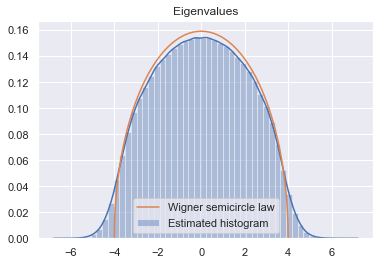

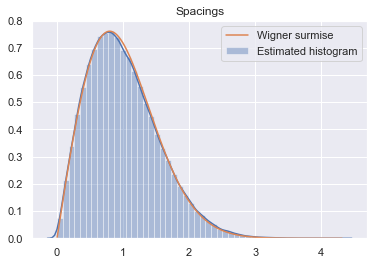

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
sns.set(color_codes=True)

wigner_surmise = {
    GOE: lambda s: np.pi / 2 * s * np.exp(-np.pi / 4 * s ** 2),
    GUE: lambda s: 32 / np.pi**2 * s**2 * np.exp(-4/np.pi * s**2)
}

def statistics(n_samples, N, ensemble=GOE, SPACINGS = True):
    all_eigenvalues = []
    if SPACINGS:
        all_spacings = []
    for i in tqdm.tnrange(n_samples):
        matrix = ensemble(N)
        eigenvalues = np.linalg.eigvalsh(matrix)
        
        all_eigenvalues.extend(eigenvalues)
        eigenvalues = np.sort(eigenvalues)
        if SPACINGS:
            if N < 10:
                eigenvalues = eigenvalues[eigenvalues.size//2-1:eigenvalues.size//2+1]
            else:
                eigenvalues = eigenvalues[eigenvalues.size//4: eigenvalues.size//4 * 3]
            spacings = np.diff(eigenvalues)
            all_spacings.extend(spacings)
    sns.distplot(all_eigenvalues, label="Estimated histogram")
    plt.title("Eigenvalues")
    heights, bins = np.histogram(all_eigenvalues)
    R = np.sqrt(2*N)
    bin_plot_x = np.linspace(-R, R, 1000)
    plt.plot(bin_plot_x, semicircle_law(bin_plot_x, R), label="Wigner semicircle law")
    plt.legend(loc='best')
    
    if SPACINGS:
        all_spacings = np.array(all_spacings) / np.mean(all_spacings)
        plt.figure()
        sns.distplot(all_spacings, label="Estimated histogram")
        plt.title("Spacings")
        heights, bins = np.histogram(all_spacings)
        bin_plot_x = np.linspace(bins.min(), bins.max(), 1000)
        plt.plot(bin_plot_x, wigner_surmise[ensemble](bin_plot_x), label="Wigner surmise")
        plt.legend(loc='best')

statistics(n_samples = 200000, N = 8)

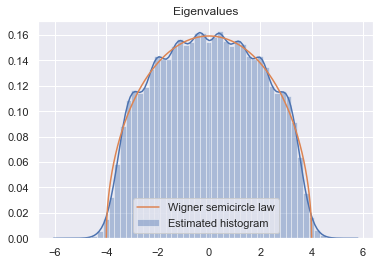

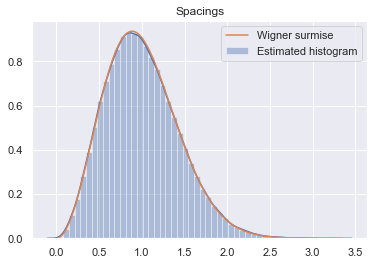

In [82]:
statistics(n_samples = 200000, N = 8, ensemble=GUE)

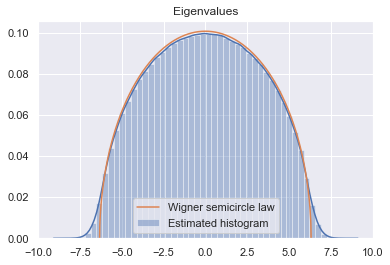

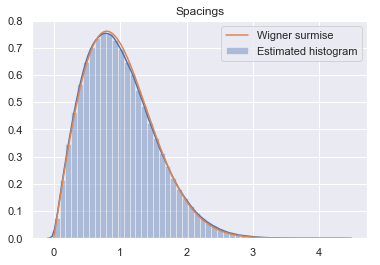

In [83]:
statistics(N = 20, n_samples = 200000)

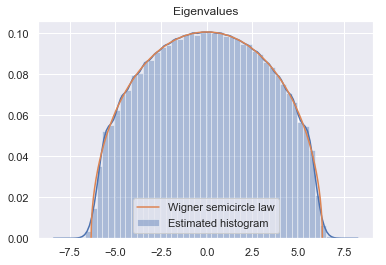

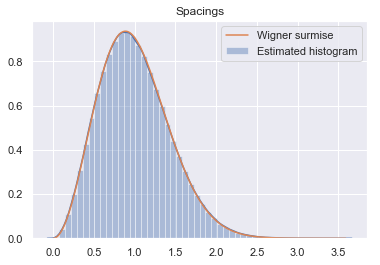

In [84]:
statistics(N = 20, n_samples = 200000, ensemble=GUE)

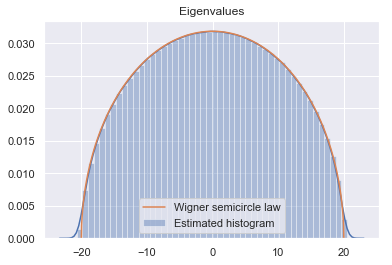

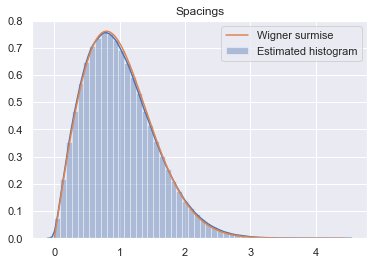

In [85]:
statistics(N=200, n_samples=10000)

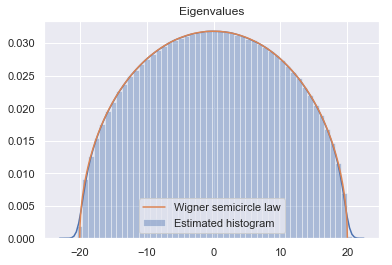

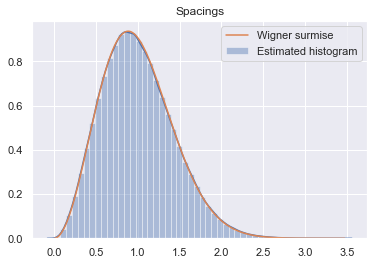

In [86]:
statistics(N=200, n_samples=10000, ensemble=GUE)

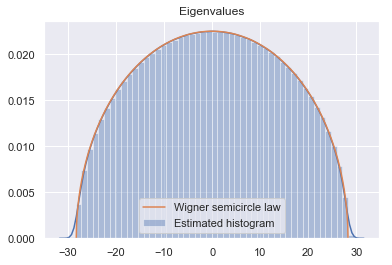

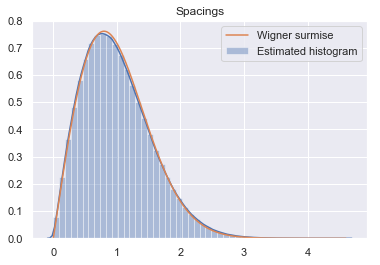

In [87]:
statistics(N=400, n_samples=5000)

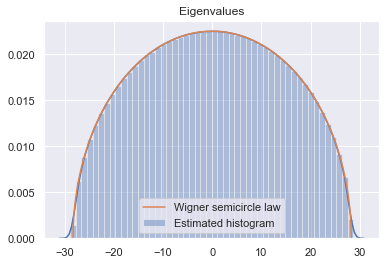

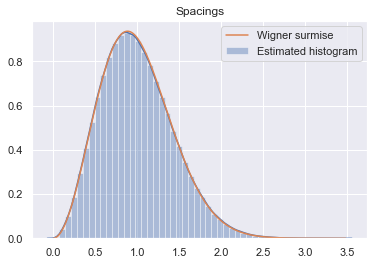

In [88]:
statistics(N=400, n_samples=5000, ensemble=GUE)

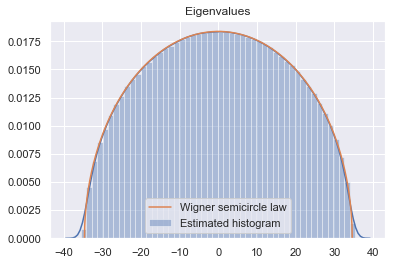

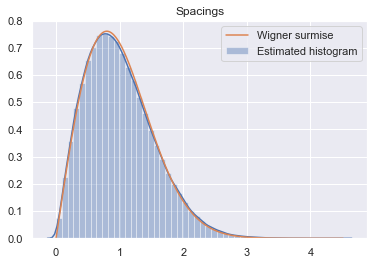

In [89]:
statistics(N=600, n_samples=1000)

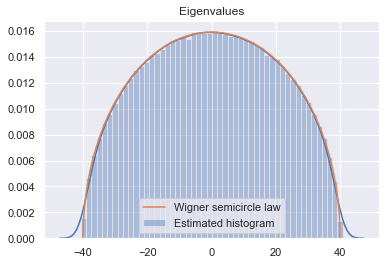

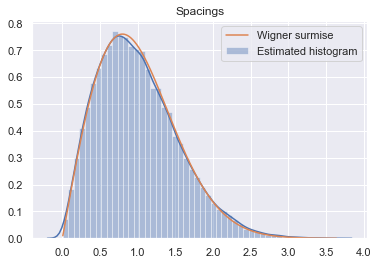

In [90]:
statistics(N=800, n_samples=100)

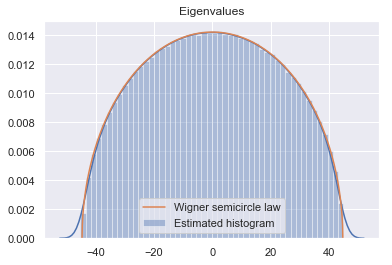

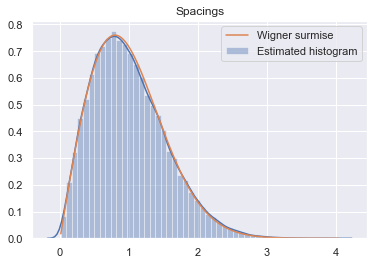

In [91]:
statistics(N=1000, n_samples=100)

# Extra
Calculate eigen-phases of the one-step kicked rotator unitary matrix F.
We can prepare an ensemble by substituting K cos(xn) → K cos(xn + θ)
and using some 20 random values for θ. Plot a histogram of the
eigen-phases to ensure it is flat and then prepare the histogram of
energy spacings. Show the results e.g. for K = 10 and K = 2.1 (you
can also experiment with other values).
Try to compare with the Wigner and Poisson distributions.

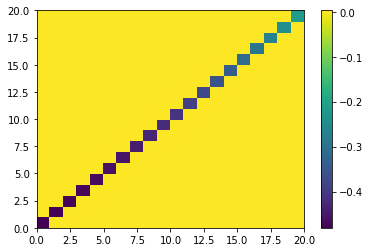

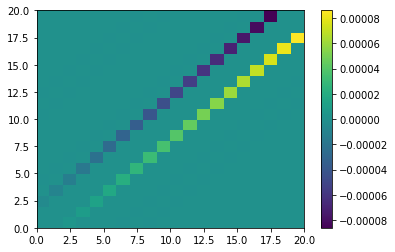

In [27]:
import scipy, scipy.linalg
# def quantum_map_F(M, K,):
M = 1000
K = 1
x = np.arange(M) * np.pi / M
theta = 0
hbar = 2 * np.pi / M
p = np.zeros((M, M), dtype=complex)
V = np.exp(-1j*K*np.cos(x + theta) / hbar)
F = np.diag(V)
from scipy import fft, ifft

rows, cols = np.indices(p.shape)
for k in [-1, 1]:
    row_vals = np.diag(rows, k=k)
    col_vals = np.diag(cols, k=k)
    p[row_vals, col_vals]=1
# row_vals = np.diag(rows, k=0)
# col_vals = np.diag(cols, k=0)
# p[row_vals, col_vals]=-2
p *= -1j*hbar

Pm = np.exp(-1j * x**2 / (2 * hbar))

pF = scipy.linalg.expm(-1j*p@p / 2 / hbar)

full_F = pF @ F
# full_F = (full_F + 1j * full_F)/np.sqrt(2)
full_F = (full_F + full_F.conj().T)/2
plt.pcolormesh(full_F[:20, :20].real);
plt.colorbar()
plt.figure()
plt.pcolormesh(full_F[:20, :20].imag);
plt.colorbar()

True

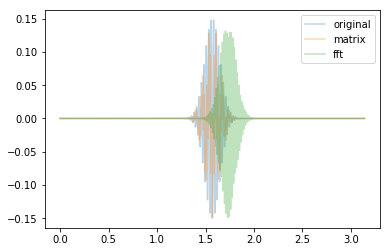

In [31]:
def initial_condition_mirror(x, wavepacket_x_center, p, wavepacket_p_center, d = 4):
    D = np.linspace(-d, d, 2*d+1).reshape(1, 2*d+1)
    psi_0 = np.exp(1j * wavepacket_p_center * x / hbar)
    mirror_images = np.exp(-(x[:, np.newaxis] - wavepacket_x_center + 2 * np.pi * D)**2 / (2 * hbar))
#     plt.plot(mirror_images)
    psi_0 = psi_0 * mirror_images.sum(axis=1)
    psi_0 /= np.linalg.norm(psi_0)
    return psi_0

def iterate(psi, Vn, Pm):
    psi_V = Vn * psi
    psi_V_fft = fft(psi_V) / np.sqrt(M) # np.sqrt(2 * np.pi) # normalizacja jest tak naprawdę bezużyteczna
    psi_V_fft_p = Pm * psi_V_fft 
    psi_new = ifft(psi_V_fft_p) * np.sqrt(M) # * np.sqrt(M)# / np.sqrt(2*np.pi)
    return psi_new

psi = initial_condition_mirror(x, np.pi/2, 0.1, np.pi/2)
plt.plot(x, psi.real, label="original", alpha=0.3)
plt.plot(x, (full_F @ psi).real, label="matrix", alpha=0.3)
plt.plot(x, iterate(psi, V, Pm).real, label="fft", alpha=0.3)
plt.legend()
# plt.pcolormesh(np.abs(full_F - np.conj(full_F).T))

np.isclose(np.linalg.norm(full_F - np.conj(full_F).T), 0)

False

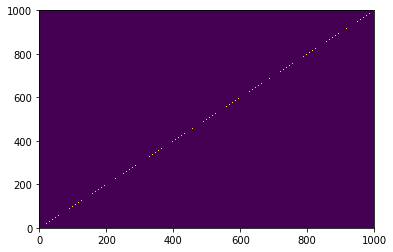